In [1]:
'''
20251113:
    分析不同语种神经元的激活情况

'''

'\n20251113:\n    分析不同语种神经元的激活情况\n\n'

In [2]:
import numpy as np


def get_quantile(data):
    # 示例数据（替换成你的数据）
    #data = [3.2, 5.1, 7.4, 2.8, 6.0, 4.9, 8.2, 1.5, 9.0]
    
    # 想查看的分位点（百分比形式，例如 0.25 表示 25% 分位）
    quantiles = [0.1, 0.25, 0.5, 0.75, 0.9]
    
    # 计算分位数
    results = np.quantile(data, quantiles)
    
    # 打印结果
    for q, r in zip(quantiles, results):
        print(f"{int(q*100)}% 分位数: {r}")


In [17]:
def get_key_quan(data, key):
    all_neuron_data = []
    for inu in data[key]:#data['model.layers.0.mlp.down_proj.weight']:
        #print(inu.shape)
        all_neuron_data.extend(inu.float().numpy().tolist())
    
    get_quantile(all_neuron_data)

In [30]:
def calc_per_neu_mean(data):
    '''
    对每种语言，计算每个神经元的均值/方差

    '''
    result={}

    for ikey in data.keys():

        # mean & var dict
        result[ikey]={}

        
        result[ikey]['mean'] = np.mean(np.array([itmp.float().numpy().tolist() for itmp in data[ikey] ]), axis =1)
        result[ikey]['var'] = np.var(np.array([itmp.float().numpy().tolist() for itmp in data[ikey] ]), axis = 1)
    return result
        

In [41]:
def calc_mean_var_diff(result_other_lang, result_en):
    '''
    计算其他语言和英语神经元 均值和方差的diff

    '''

    all_mean_diff = []
    for ikey in result_other_lang.keys():
        o_lang = np.array(result_other_lang[ikey]['mean'].tolist())
        en_lang = np.array(result_en[ikey]['mean'].tolist())

        mean_diff = o_lang - en_lang

        all_mean_diff.extend(mean_diff.tolist())

    return all_mean_diff
    

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# 你的 diff 数据

def drwa_ecdf(data):
    '''
    data = np.array([
        0.00023478745424654335,
        -8.707778761163354e-05,
        -0.0002664269686647458,
        -0.00013238142128102481,
        1.3182201655581594e-05,
        -5.4263437050394714e-05,
        -0.0002950956331915222,
        -0.0004534808249445632
    ])
    '''
    
    # ECDF 计算
    x = np.sort(data)
    y = np.arange(1, len(data) + 1) / len(data)
    
    # 画图
    plt.figure(figsize=(6, 4))
    plt.step(x, y, where='post')
    plt.xlabel("diff values")
    plt.ylabel("ECDF")
    plt.title("ECDF of diff distribution")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# 20251113

In [4]:
import torch

In [5]:
data_path='/root/autodl-fs/output_grad/gemma-3-1b-it/en/lrp.pt'

In [6]:
data = torch.load(data_path, map_location=torch.device('cpu'))



In [16]:
data_vi = torch.load('/root/autodl-fs/output_grad/gemma-3-1b-it/vi/lrp.pt', map_location=torch.device('cpu'))

In [31]:
data_neu_result = calc_per_neu_mean(data)
data_vi_neu_result = calc_per_neu_mean(data_vi)

In [42]:
mean_diff=calc_mean_var_diff(data_vi_neu_result, data_neu_result)

In [44]:
'''
均值diff的分布范围

'''

'\n均值diff的分布范围\n\n'

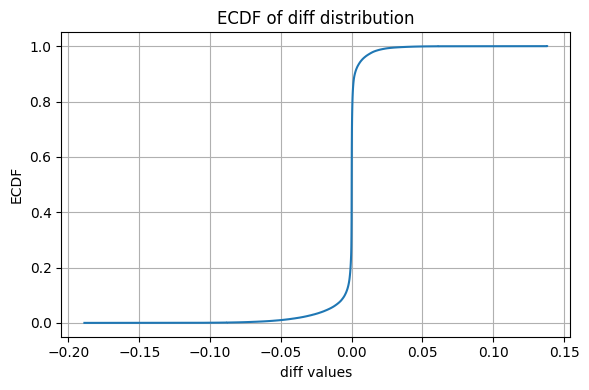

In [47]:
drwa_ecdf(np.array(mean_diff))

In [45]:
mean_diff

[0.00023478745424654335,
 -8.707778761163354e-05,
 -0.0002664269686647458,
 -0.00013238142128102481,
 1.3182201655581594e-05,
 -5.4263437050394714e-05,
 -0.0002950956331915222,
 -0.0004534808249445632,
 1.570439781062305e-05,
 0.00010918673615378793,
 -1.8308055587112904e-06,
 -0.0005048358434578404,
 -0.00041587491523387143,
 -0.0002726164530031383,
 3.691016900120303e-05,
 -3.861130971927196e-05,
 0.0004122239952266682,
 -0.00044001522110193036,
 -0.0005502562853507698,
 -0.00019877526210621,
 4.9323229177389294e-05,
 -0.00013075218885205686,
 -0.0002580929867690429,
 9.200818021781743e-05,
 9.71989102254156e-05,
 0.00023642323503736407,
 0.00021306915732566267,
 -0.0005435957664303714,
 -6.049926014384255e-05,
 -0.0006489293155027553,
 6.011886216583662e-05,
 0.00013480220513883978,
 -4.406459629535675e-05,
 5.74813648199779e-05,
 -0.0002870846292353235,
 0.00011700977847795002,
 -0.00026362590506323613,
 0.0007892475841799751,
 1.398497261106968e-05,
 -0.00024083453172352165,
 5.29

In [34]:
data_neu_result['model.layers.25.mlp.down_proj.weight']

{'mean': array([-2.38119264e-02, -3.45425341e-02, -1.53310498e-02, -3.43324443e-02,
        -2.32918262e-02,  5.44926193e-03, -1.20341827e-02,  6.18050496e-03,
        -5.81717491e-03,  1.43132408e-02, -2.97678775e-02, -1.96201404e-02,
        -1.79942714e-02, -8.21619564e-03,  3.97978392e-03, -5.57584564e-03,
         1.42397119e-02,  2.82128851e-02, -2.58416327e-02,  1.87514598e-02,
         8.51600369e-03, -2.96815899e-03, -1.18688742e-03, -1.85993910e-02,
         1.79726548e-03, -1.12243659e-02, -1.58983601e-02, -2.02607115e-02,
         4.49041526e-03, -6.94245762e-03,  8.59651508e-04, -7.90435407e-03,
         9.97444325e-03, -7.09260814e-04, -1.78002583e-02, -3.26603585e-02,
        -2.11065345e-03,  1.91532572e-03, -4.83536952e-02, -2.23678168e-02,
        -1.15232931e-02, -1.08075639e-03, -2.92652448e-02,  1.84377995e-02,
        -1.12490853e-02, -4.38274609e-03,  3.11696198e-03,  1.15826540e-02,
        -3.37575542e-03, -2.23004652e-02, -6.42160575e-04, -7.43108657e-03,
    

In [35]:
data_vi_neu_result['model.layers.25.mlp.down_proj.weight']

{'mean': array([-0.07093204, -0.05271608, -0.05006902, -0.04516286, -0.08126508,
        -0.0800415 , -0.08919949, -0.05059637, -0.12613365, -0.05594657,
        -0.04187763, -0.08214543, -0.06834735, -0.06023985, -0.05355349,
        -0.06986336, -0.05941318, -0.03074584, -0.04740571, -0.02717342,
        -0.05768245, -0.07339083, -0.05787617, -0.087263  , -0.05445906,
        -0.09850127, -0.05564315, -0.10485224, -0.04292427, -0.03076179,
        -0.06753568, -0.05106528, -0.06153915, -0.05471267, -0.06022271,
        -0.0541912 , -0.04697651, -0.05576254, -0.032357  , -0.09699886,
        -0.07704493, -0.03715025, -0.10409101, -0.04997383, -0.05166753,
        -0.05557119, -0.08023428, -0.04643232, -0.0440607 , -0.05313642,
        -0.06424081, -0.10415355, -0.04929743, -0.0679798 , -0.04326785,
        -0.05859665, -0.0892798 , -0.06259097, -0.05728916, -0.05374724,
        -0.05657242, -0.03226157, -0.07693531, -0.03986122, -0.0460888 ,
        -0.02805841, -0.06628784, -0.041565

## 分位数

In [18]:
get_key_quan(data_vi, 'model.layers.0.mlp.down_proj.weight')

10% 分位数: -0.474609375
25% 分位数: -0.201171875
50% 分位数: -0.00019693374633789062
75% 分位数: 0.1982421875
90% 分位数: 0.455078125


In [19]:
get_key_quan(data_vi,'model.layers.25.mlp.down_proj.weight')

10% 分位数: -2.109375
25% 分位数: -1.015625
50% 分位数: -0.0052490234375
75% 分位数: 1.0
90% 分位数: 2.109375


In [7]:
get_key_quan(data, 'model.layers.0.mlp.down_proj.weight')

10% 分位数: -0.25390625
25% 分位数: -0.107421875
50% 分位数: 0.003204345703125
75% 分位数: 0.11572265625
90% 分位数: 0.263671875


In [8]:
get_key_quan(data,'model.layers.25.mlp.down_proj.weight')

10% 分位数: -1.1015625
25% 分位数: -0.5234375
50% 分位数: 0.0034332275390625
75% 分位数: 0.53515625
90% 分位数: 1.1640625


In [9]:
get_key_quan(data,'model.layers.0.self_attn.q_proj.weight')

10% 分位数: -0.00677490234375
25% 分位数: -0.002593994140625
50% 分位数: -4.1909515857696533e-07
75% 分位数: 0.002410888671875
90% 分位数: 0.006439208984375


In [10]:
get_key_quan(data,'model.layers.25.self_attn.q_proj.weight')

10% 分位数: -0.00811767578125
25% 分位数: -0.0026702880859375
50% 分位数: 4.954636096954346e-07
75% 分位数: 0.002685546875
90% 分位数: 0.0079345703125


In [11]:
get_key_quan(data,'model.layers.25.self_attn.k_proj.weight')

10% 分位数: -0.0167236328125
25% 分位数: -0.006134033203125
50% 分位数: 0.0
75% 分位数: 0.005859375
90% 分位数: 0.016845703125


In [12]:
get_key_quan(data,'model.layers.25.self_attn.v_proj.weight')

10% 分位数: -0.134765625
25% 分位数: -0.054931640625
50% 分位数: -0.0020751953125
75% 分位数: 0.046142578125
90% 分位数: 0.119140625


In [13]:
get_key_quan(data,'model.layers.0.self_attn.v_proj.weight')

10% 分位数: -0.158203125
25% 分位数: -0.07080078125
50% 分位数: -0.00445556640625
75% 分位数: 0.060302734375
90% 分位数: 0.1376953125


In [14]:
#data['model.layers.0.mlp.down_proj.weight']

In [15]:
data.keys()

dict_keys(['model.embed_tokens.weight', 'model.layers.0.self_attn.q_proj.weight', 'model.layers.0.self_attn.k_proj.weight', 'model.layers.0.self_attn.v_proj.weight', 'model.layers.0.self_attn.o_proj.weight', 'model.layers.0.self_attn.q_norm.weight', 'model.layers.0.self_attn.k_norm.weight', 'model.layers.0.mlp.gate_proj.weight', 'model.layers.0.mlp.up_proj.weight', 'model.layers.0.mlp.down_proj.weight', 'model.layers.0.input_layernorm.weight', 'model.layers.0.post_attention_layernorm.weight', 'model.layers.0.pre_feedforward_layernorm.weight', 'model.layers.0.post_feedforward_layernorm.weight', 'model.layers.1.self_attn.q_proj.weight', 'model.layers.1.self_attn.k_proj.weight', 'model.layers.1.self_attn.v_proj.weight', 'model.layers.1.self_attn.o_proj.weight', 'model.layers.1.self_attn.q_norm.weight', 'model.layers.1.self_attn.k_norm.weight', 'model.layers.1.mlp.gate_proj.weight', 'model.layers.1.mlp.up_proj.weight', 'model.layers.1.mlp.down_proj.weight', 'model.layers.1.input_layernorm.